###Dataset Import


In [50]:
import pandas as pd
import numpy as np

In [51]:
from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset  (2).csv


In [52]:
jp = pd.read_csv ("Dataset .csv")
jp.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [53]:
jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [54]:
jp.shape

(9551, 21)

### Level 2 - Task 1

Table Booking and Online Delivery

Step 1: Determine the Percentage of Restaurants that Offer Table Booking and Online Delivery

In [55]:
table_booking_counts = jp['Has Table booking'].value_counts(normalize=True) * 100
table_booking_percentage = table_booking_counts.to_dict()
print("Percentage of restaurants that offer table booking:")
print(table_booking_percentage)

Percentage of restaurants that offer table booking:
{'No': 87.87561511883573, 'Yes': 12.124384881164275}


In [56]:
online_delivery_counts = jp['Has Online delivery'].value_counts(normalize=True) * 100
online_delivery_percentage = online_delivery_counts.to_dict()
print("Percentage of restaurants that offer online delivery:")
print(online_delivery_percentage)

Percentage of restaurants that offer online delivery:
{'No': 74.33776567898649, 'Yes': 25.662234321013504}


Step 2: Compare the Average Ratings of Restaurants with Table Booking and Those Without

In [57]:
avg_rating_with_booking = jp[jp['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_booking = jp[jp['Has Table booking'] == 'No']['Aggregate rating'].mean()

print(f"Average rating of restaurants with table booking: {avg_rating_with_booking}")
print(f"Average rating of restaurants without table booking: {avg_rating_without_booking}")

Average rating of restaurants with table booking: 3.4419689119170984
Average rating of restaurants without table booking: 2.559358989634219


Step 3: Analyze the Availability of Online Delivery Among Restaurants with Different Price Ranges

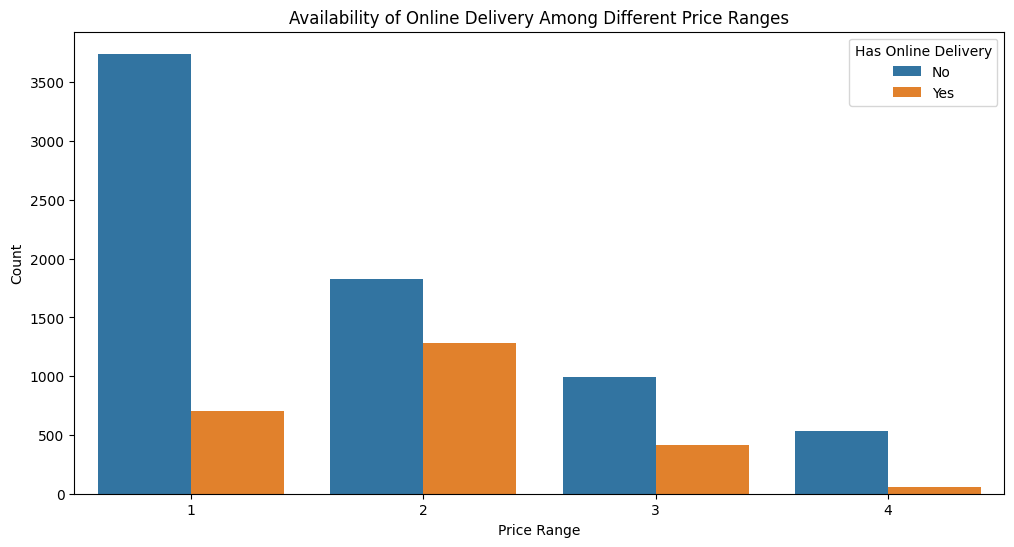

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=jp)
plt.title('Availability of Online Delivery Among Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Has Online Delivery')
plt.show()

### Level 2 - Task 2

Price Range Analysis Plan

Step 1: Determine the Most Common Price Range

In [59]:
most_common_price_range = jp['Price range'].mode()[0]
print(f"The most common price range is: {most_common_price_range}")

The most common price range is: 1


Step 2: Calculate the Average Rating for Each Price Range

In [60]:
average_rating_per_price_range = jp.groupby('Price range')['Aggregate rating'].mean()
print("Average rating for each price range:")
print(average_rating_per_price_range)

Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


Step 3: Identify the Color Representing the Highest Average Rating Among Different Price Ranges

In [61]:
average_rating_per_price_and_color = jp.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().reset_index()
highest_rating_color_per_price_range = average_rating_per_price_and_color.loc[average_rating_per_price_and_color.groupby('Price range')['Aggregate rating'].idxmax()]

In [62]:
print("Highest average rating color for each price range:")
print(highest_rating_color_per_price_range)

Highest average rating color for each price range:
    Price range Rating color  Aggregate rating
0             1   Dark Green          4.668750
6             2   Dark Green          4.627536
12            3   Dark Green          4.646032
18            4   Dark Green          4.709459


### Level 2 - Task 3

Feature Engineering

Extract additional features from the existing
columns, such as the length of the restaurant
name or address.

In [63]:
jp['Restaurant Name Length'] = jp['Restaurant Name'].apply(len)

In [64]:
jp['Address Length'] = jp['Address'].apply(len)

In [65]:
jp[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head()

,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.

In [66]:
jp['Has Table Booking'] = jp['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

In [67]:
jp['Has Online Delivery'] = jp['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [68]:
jp[['Restaurant Name','Has Table Booking', 'Has Online Delivery']].head()


,Restaurant Name,Has Table Booking,Has Online Delivery
0,Le Petit Souffle,1,0
1,Izakaya Kikufuji,1,0
2,Heat - Edsa Shangri-La,1,0
3,Ooma,0,0
4,Sambo Kojin,1,0


from matplotlib import pyplot as plt
_df_6['Has Table Booking'].plot(kind='hist', bins=20, title='Has Table Booking')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Restaurant Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Has Online Delivery']
  ys = series['Has Table Booking']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Has Online Delivery', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Restaurant Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Restaurant Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Has Online Delivery')
_ = plt.ylabel('Has Table Booking')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Has Online Delivery']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Has Online Delivery'}, axis=1)
              .sort_values('Has Online Delivery', ascending=True))
  xs = counted['Has Online Delivery']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Has Online Delivery', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Restaurant Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Restaurant Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Has Online Delivery')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['Has Table Booking'].plot(kind='line', figsize=(8, 4), title='Has Table Booking')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Restaurant Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Has Table Booking', y='Restaurant Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)